In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mixture_model import KMeans
from sklearn.datasets import make_blobs
from jupyterthemes import jtplot
jtplot.style(theme='onedork', grid=False, ticks=True)
np.random.seed(1024)

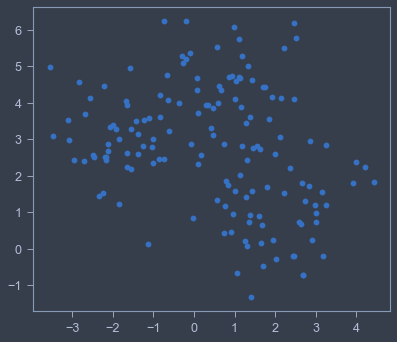

In [41]:
X, y, true_centers = make_blobs(n_samples=150, centers=3, n_features=2, random_state=0, return_centers=True)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [42]:
model = KMeans(classes=3)
means, results = model.fit(X, iters=20)

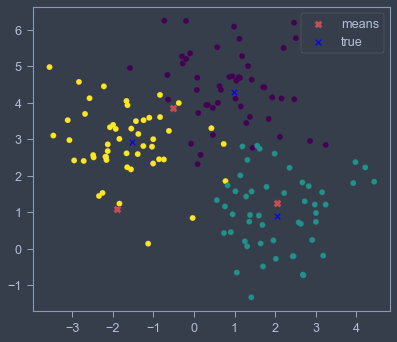

iters: 21


In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(means[:, 0], means[:, 1], marker='x', alpha=1., c='r', label='means', linewidths=3)
plt.scatter(true_centers[:, 0], true_centers[:, 1], marker='x', alpha=1, c='blue', label='true')
plt.legend()
plt.show()
print(f'iters: {len(model.iter_means)}')

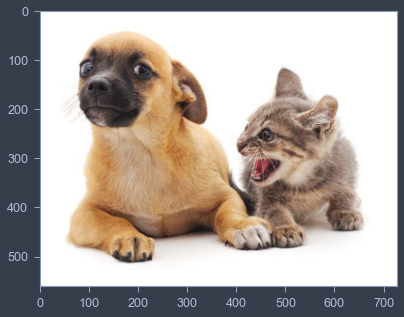

In [32]:
img = plt.imread('../data/catdog.jpg')
plt.imshow(img)
h, w = img.shape[:-1]
pixel = img.reshape(-1, 3) / 256

In [33]:
split_model = KMeans(classes=2)
centers, results = split_model.fit(pixel)

In [34]:
img_split = pixel
for k in range(len(centers)):
    img_split[results == k] = centers[k]
img_split = (img_split * 256).astype(int)

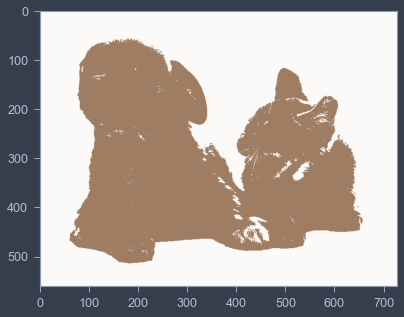

In [35]:
plt.imshow(img_split.reshape(h, w, -1))

In [36]:
from mixture_model import GaussianMixture

In [46]:
gm_model = GaussianMixture(3)
gm_model.fit(X)

In [47]:
classes = gm_model.result
gm_means = gm_model.means

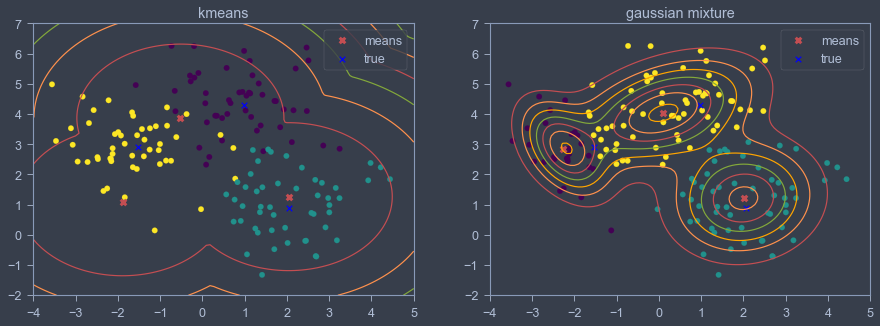

In [48]:
a, b = np.meshgrid(np.linspace(-4, 5, 100), np.linspace(-2, 7, 100))
meshgrid = np.concatenate([a.reshape(1, -1), b.reshape(1, -1)], axis=0).T
z1 = model.predict(meshgrid)
z2 = gm_model.predict_prob(meshgrid)

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('kmeans')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(means[:, 0], means[:, 1], marker='x', alpha=1., c='r', label='means', linewidths=3)
plt.scatter(true_centers[:, 0], true_centers[:, 1], marker='x', alpha=1, c='blue', label='true')
plt.contour(a, b, model.dist(meshgrid).min(-1).reshape(100, -1), colors=('g', 'r', 'y'))
plt.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('gaussian mixture')
plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(gm_means[:, 0], gm_means[:, 1], marker='x', alpha=1., c='r', label='means', linewidths=3)
plt.scatter(true_centers[:, 0], true_centers[:, 1], marker='x', alpha=1, c='blue', label='true')
plt.contour(a, b, gm_model._pdf(meshgrid).reshape(100, -1), colors=('g', 'r', 'y', 'orange'))
plt.legend()
plt.show()

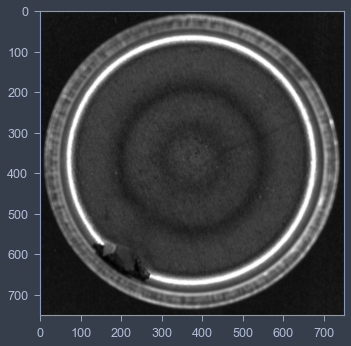

In [95]:
import cv2
img = plt.imread('../data/test1.png')
# print(img.max())
# plt.imshow(img, cmap='gray')
img_mean_blur = cv2.GaussianBlur(img, (3, 3), 0)
plt.imshow(img_mean_blur, cmap='gray')
h, w = img.shape
pixel = img.reshape(-1, 1)

In [85]:
split_model = KMeans(n_classes=4)
centers, results = split_model.fit(pixel)
img_split = pixel
for k in range(len(centers)):
    img_split[results == k] = centers[k]

float32


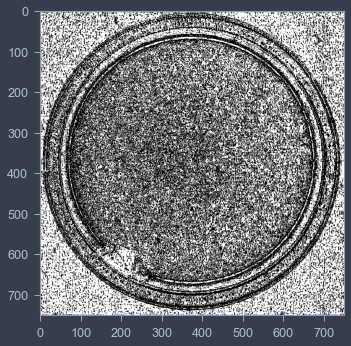

In [90]:
print(img_split.dtype)
target = img_split
target[results == 0] = 0.
target[results == 1] = 0.
target[results == 2] = 255.
target[results == 3] = 0.
fig = plt.imshow(target.reshape(h, w), cmap='gray')
coord = np.where(results == 3)[0]
(x, y) = coord//h, coord % w

C:\Users\98311\AppData\Local\Temp\ipykernel_6568\939952847.py:2: MatplotlibDeprecationWarning: Passing argument *p* of unexpected type PathCollection to add_patch which only accepts <class 'matplotlib.patches.Patch'> is deprecated since 3.5 and will become an error two minor releases later.
  fig.axes.add_patch(plt.scatter(0, 0))


AttributeError: 'PathCollection' object has no attribute 'get_path'

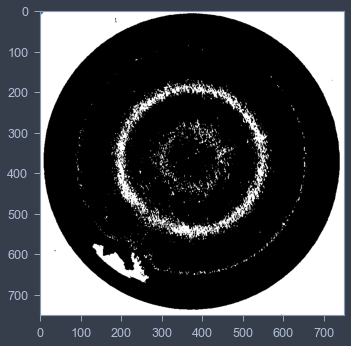

In [81]:
fig = plt.imshow(target.reshape(h, w), cmap='gray')
# fig.axes.add_patch(plt.plot(x, y))

## Bernoulli Mixture model

In [2]:
from sklearn.datasets import fetch_openml
from mixture_model import BernolliMixture

In [3]:
images, targets = fetch_openml("mnist_784", return_X_y=True, as_frame=False)

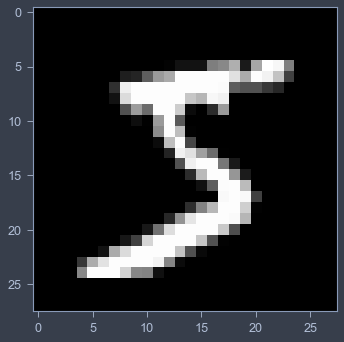

In [4]:
images = images.reshape(-1, 28, 28)
plt.imshow(images[0], cmap='gray')
plt.show()

In [6]:
classes = ['2', '3', '4']
data = []
label = [[i]*200 for i in range(len(classes))]
for l in classes:
    data.append(images[targets == l][: 200])
data = np.concatenate(data, axis=0)
label = np.concatenate(label)

In [7]:
data = data.reshape(600, -1) / 255
data[data >= 0.5] = 1
data[data < 0.5] = 0

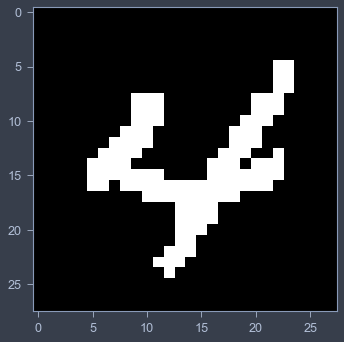

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label)
images = X_train.reshape(-1, 28, 28)
plt.imshow(images[0], cmap='gray')
plt.show()
class_map = {'2' : 0, '3': 1, '4': 2}

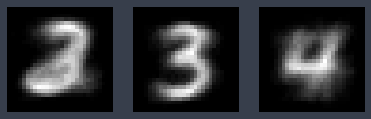

In [26]:
bmm = BernolliMixture(classes = len(classes))
bmm.fit(X_train)
for i, mean in enumerate(bmm.u):
    plt.subplot(1, 3, i + 1)
    plt.imshow(mean.reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()

In [29]:
y_pred = bmm.predict(X_test)
test_acc = (y_pred == y_test).sum() / y_pred.shape[0]
test_acc

0.78

In [31]:
y_pred = bmm.predict(X_train)
train_acc = (y_pred == y_train).sum() / y_pred.shape[0]
train_acc

0.7666666666666667